In [11]:
import numpy as np
from numpy import genfromtxt
# the synthectic query workload
# long range: from -180 to 180, the first column
# lat range: from -90 to 90, the second column
query_collection = genfromtxt("/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/TPCH_C1000_P10_S10000_100_10.csv", delimiter=',')

In [33]:
# temp = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
# print(temp)
# #arr = np.arange(10)
# np.random.shuffle(temp)
# print(temp)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
[[9, 10, 11, 12], [13, 14, 15, 16], [5, 6, 7, 8], [1, 2, 3, 4]]


In [12]:
def getoverlap(al, au, bl, bu):
    return max(0, min(au,bu)-max(al,bl))

In [13]:
# this works for one dimension only !
# @ query collection: the first column represent the lower 
#   value, the second column represent the upper value
def bounding_union(query_collection):
    
    # should keep it ordered first by the lower interval !!!!!!
    query_collection = query_collection[query_collection[:,0].argsort()]
    
    remaining_query = query_collection
    bounded_intervals = []
    
    while len(remaining_query) != 0:
        
        initial_interval = [remaining_query[0][0], remaining_query[0][1]]
        temp_interval = []
        
        for i in range(len(remaining_query)):
            
            overlap = getoverlap(initial_interval[0],initial_interval[1],remaining_query[i][0], remaining_query[i][1])
            
            # there is no overlap
            if overlap == 0:
                temp_interval.append([remaining_query[i][0], remaining_query[i][1]])
            else: # update interval border
                initial_interval[0] = min(initial_interval[0], remaining_query[i][0])
                initial_interval[1] = max(initial_interval[1], remaining_query[i][1])
                
        bounded_intervals.append(initial_interval)
        remaining_query = temp_interval
    
    return bounded_intervals

In [14]:
# should already prune the non-relevant dimensions
def bounding_intersect(query_collection):
    pass

In [15]:
# start from the intersection center
# gradually enlarge its border
# until a% of the fully union way
def bounding_hybrid(query_collection):
    pass

In [16]:
# # Test
# queries_long = query_collection[:,0:2]
# bounded_intervals = bounding_union(queries_long)
# print(bounded_intervals)
# # save to .csv
# np.savetxt('/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/Dim1_QueryBound_Tweet_C10_P10_S5.csv',bounded_intervals,delimiter=',')

In [18]:
def bound_queries(query_collection):
    # number of dimensions
    dims = int(len(query_collection[0])/2)
    bounded_queries = []
    for i in range(dims):
        queries_1dim = query_collection[:,2*i:2*i+2]
        bounded_intervals = bounding_union(queries_1dim)
        bounded_queries.append(bounded_intervals)
        np.savetxt('/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/Dim'+str(i)+'_QueryBound_TPCH_C1000_P10_S10000_100_10.csv',bounded_intervals,delimiter=',')
    return bounded_queries
bounded_queries = bound_queries(query_collection)

[[[48348.930569318429, 131307.7800883498],
  [198984.37483528513, 260181.41331870342],
  [277633.04074048059, 404113.01215055928],
  [426346.53640633356, 682372.69463131146],
  [692930.71128328505, 778849.55792901479],
  [791905.32422612153, 854591.73858250771],
  [884561.53951433988, 1104314.7192439081],
  [1128070.2126478294, 2235428.9838595423],
  [2235626.28904386, 2267453.333515726],
  [2278681.12448955, 2352878.8202506751],
  [2353826.0436164169, 2437172.3526343782],
  [2456367.3528585206, 3113210.7222668566],
  [3121753.5218931474, 3364927.4379630624],
  [3385496.3247396341, 3442455.9184127003],
  [3446596.4029383054, 3447166.5578100109],
  [3468151.0536136567, 3672927.1422849041],
  [3673943.4548347923, 4041615.3496093214],
  [4055138.1487010107, 4112738.2113854089],
  [4121837.3699725145, 4248629.7546659224],
  [4261021.2197395302, 4644090.8228812199],
  [4648324.8766689515, 4648622.368390196],
  [4651155.0856376551, 4764258.9698196314],
  [4776164.0349855758, 4779246.20998936

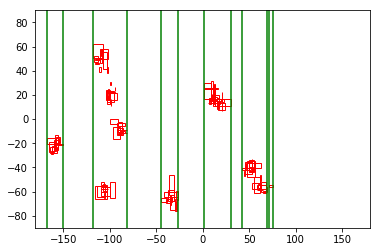

In [27]:
# plot the bounding result with regard to the original queries
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)
plt.xlim(-180,180)
plt.ylim(-90,90)
# transform the queries into boxes

query_size = len(query_collection)
# the number of boxed that will be plotted
boxes = []
for i in range(query_size):
    lower1 = query_collection[i][0]
    upper1 = query_collection[i][1]
    lower2 = query_collection[i][2]
    upper2 = query_collection[i][3]
    rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
    ax.add_patch(rect)

for i in range(len(bounded_intervals)):
    y1 = -90
    y2 = 90
    y_ = [y1, y2]
    x_1 = [bounded_intervals[i][0], bounded_intervals[i][0]]
    x_2 = [bounded_intervals[i][1], bounded_intervals[i][1]]
    plt.plot(x_1, y_,'g')
    plt.plot(x_2, y_,'g')
plt.show()

In [40]:
# Test
queries_lat = query_collection[:,2:4]
# print(queries_lat)
bounded_intervals = bounding_union(queries_lat)
print(bounded_intervals)
# save to .csv
np.savetxt('/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/Dim2_QueryBound_Tweet_C10_P10_S5.csv',bounded_intervals,delimiter=',')

[[-76.453537374671825, -33.007892020316326], [-28.622274691027325, 0.3692880563776253], [6.7893854805434195, 31.253371799524942], [38.304036705293882, 62.21071598405387]]


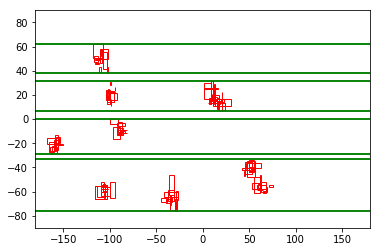

In [41]:
# plot the bounding result with regard to the original queries
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)
plt.xlim(-180,180)
plt.ylim(-90,90)
# transform the queries into boxes

query_size = len(query_collection)
# the number of boxed that will be plotted
boxes = []
for i in range(query_size):
    lower1 = query_collection[i][0]
    upper1 = query_collection[i][1]
    lower2 = query_collection[i][2]
    upper2 = query_collection[i][3]
    rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
    ax.add_patch(rect)

for i in range(len(bounded_intervals)):
    
    lower1 = query_collection[i][0]
    upper1 = query_collection[i][1]
    lower2 = query_collection[i][2]
    upper2 = query_collection[i][3]
    rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
    ax.add_patch(rect)
    
    y1 = [bounded_intervals[i][0], bounded_intervals[i][0]]
    y2 = [bounded_intervals[i][1], bounded_intervals[i][1]]
    y_1 = [y1, y1]
    y_2 = [y2, y2]
    x_ = [-180,180]
    plt.plot(x_, y_1,'g')
    plt.plot(x_, y_2,'g')
plt.show()